In [1]:
import full_trajectory
import multiprocessing

from functools import partial
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap
from collections import defaultdict
import matplotlib.gridspec as gridspec
import numpy as np

import estaudel.escaffolding as escaffolding
import estaudel.stochastic as stochastic
import estaudel.heredity.process as ehp
import estaudel.heredity.deterministic as ehd
import estaudel.heredity.stochastic as ehs
import estaudel.heredity.treeview as tv

import sys
import PIL.Image as pImage
from PIL.ImageDraw import Draw

import os 
from IPython.display import display, Image

from config import SUPFIGPATH, PANEL_DICT

%load_ext autoreload
%autoreload 2

pool = multiprocessing.Pool(6)

/home/guilhem/.local/lib/python3.5/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/guilhem/.local/lib/python3.5/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/guilhem/.local/lib/python3.5/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/guilhem/.local/lib/python3.5/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


# Supplementary figure showcasing the different reproduction regime.

In [2]:
np.random.seed(120292)
out = {}
styles = ('serial','neutral','rank','soft')
p = {k:v[0] for k,v in full_trajectory.PARAMETERS.items()}
for style in styles:
    print(style)
    p.update({'N':2,'D':40, 'selection':style, 'percentile':40,
              'collectiveSelectionStrength':0.2,
              'mutation_rate':0,
              'carrying_capacity':200,
           'initial_type0': (0,5,0.6,0.5),
          'initial_type1':(1,5,0.8,0.5)}
        )
    out[style] = full_trajectory.main(p, pool=pool)
    #print(len(out[style].parents))
    out[style].parents = out[style].parents[:-1]
    #print(len(out[style].parents))
    #print(len(t['branches']))
    #for b in t['branches']:
    #    if not 'ROOT' in b:
    #        print(b)
    t = tv.extract_tree( out[style])
    idx = {n:int(n.split('D')[1]) for n in t['position'].keys()}
    fig = tv.draw_tree_rings(branches=t['branches'],
                             xinfo=t['generation'], 
                             yinfo= t['position'], 
                             zinfo=t['colour'], 
                             oinfo=None, width=1000, height=6000, size=60)
    
    fname = os.path.join(SUPFIGPATH,'1gen{}.png'.format(style))
    fig.write_to_png(fname)
    Image(filename=fname)

serial
neutral
rank
soft


In [3]:
def concatenate_images(paths):
    images = [pImage.open(path) for path in paths]
    widths, heights = zip(*(i.size for i in images))

    total_width = sum(widths) + 60
    max_height = max(heights) 


    new_im = pImage.new('RGBA', (total_width, max_height), color=(0,0,0,1))
    draw = Draw(new_im) 

    x_offset = 10
    for n,im in enumerate(images):
        new_im.paste(im, (x_offset,0))
        x_offset += im.size[0] + 20
        if n != len(images)-1:
            draw.line((x_offset, 0, x_offset, max_height), fill='black', width=1)
        x_offset += 20
    new_im = new_im.rotate(-90, expand=True)
    return new_im

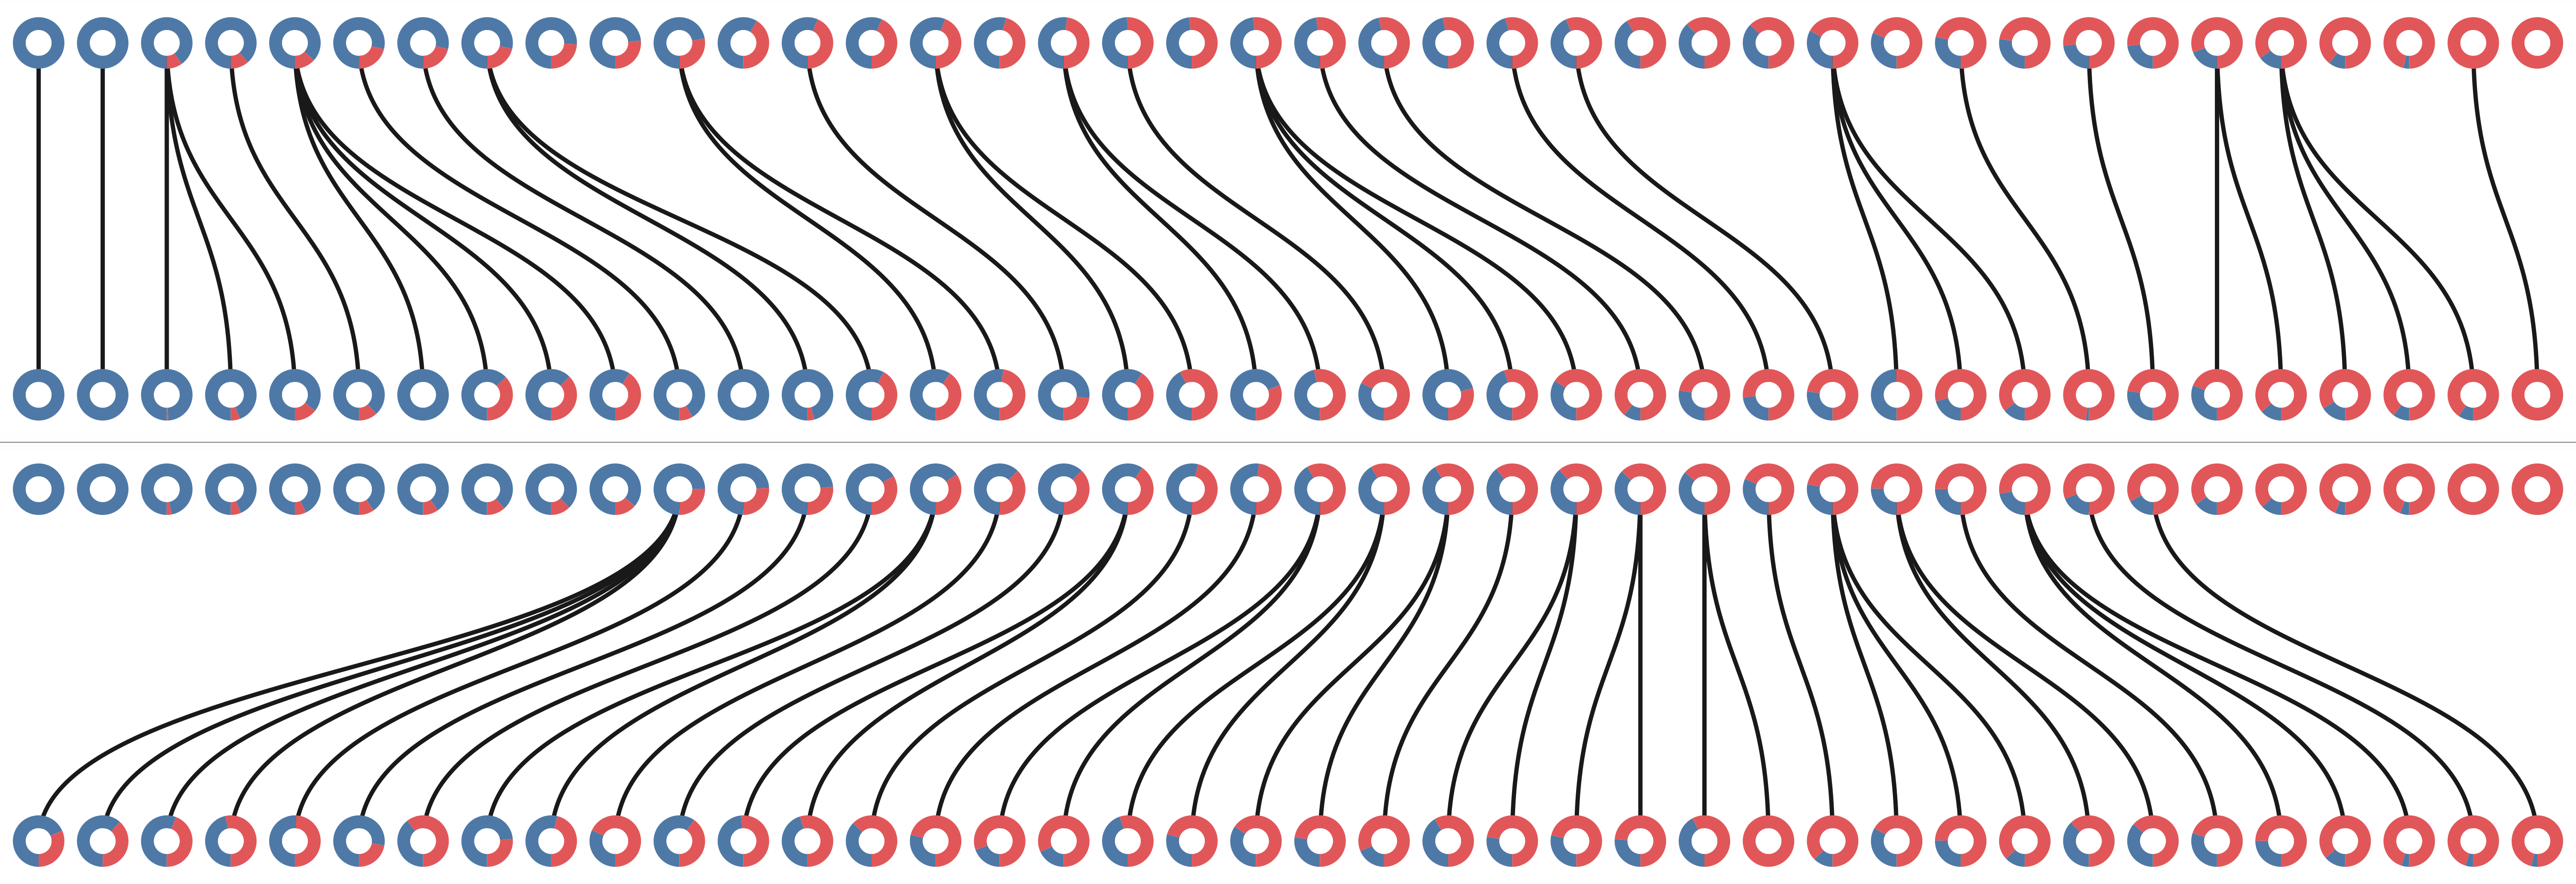

In [4]:
styles = ('neutral','rank')

fig = concatenate_images( [os.path.join(SUPFIGPATH,'1gen{}.png'.format(style)) for style in styles])
fname =  os.path.join(SUPFIGPATH,'1gen_compare.png'.format(style))
fig.save(fname)
Image(fname)

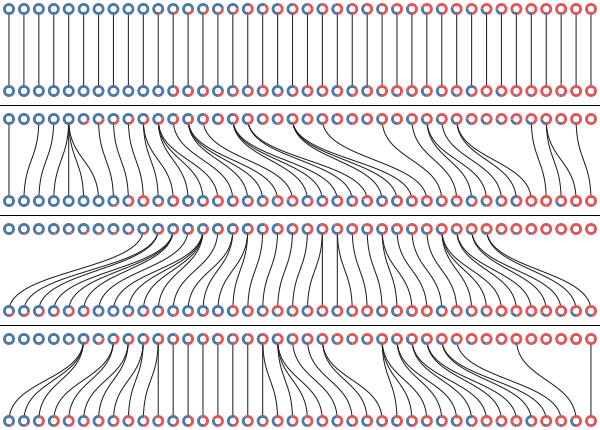

In [475]:
styles = ('serial','neutral','rank','soft')
fig = concatenate_images( [os.path.join(SUPFIGPATH,'1gen{}.png'.format(style)) for style in styles])
fname =  os.path.join(SUPFIGPATH,'1gen_compare_full.png'.format(style))
fig.save(fname)
Image(fname)

# Small trees

In [5]:
np.random.seed(120293)
p.update({'N':30,'D':20, 'selection':'neutral', 'percentile':10, 
          'initial_type0': (0,5,0.6,.5),
      'initial_type1':(1,5,0.8,.5)}
    )
out = full_trajectory.main(p, pool=pool)

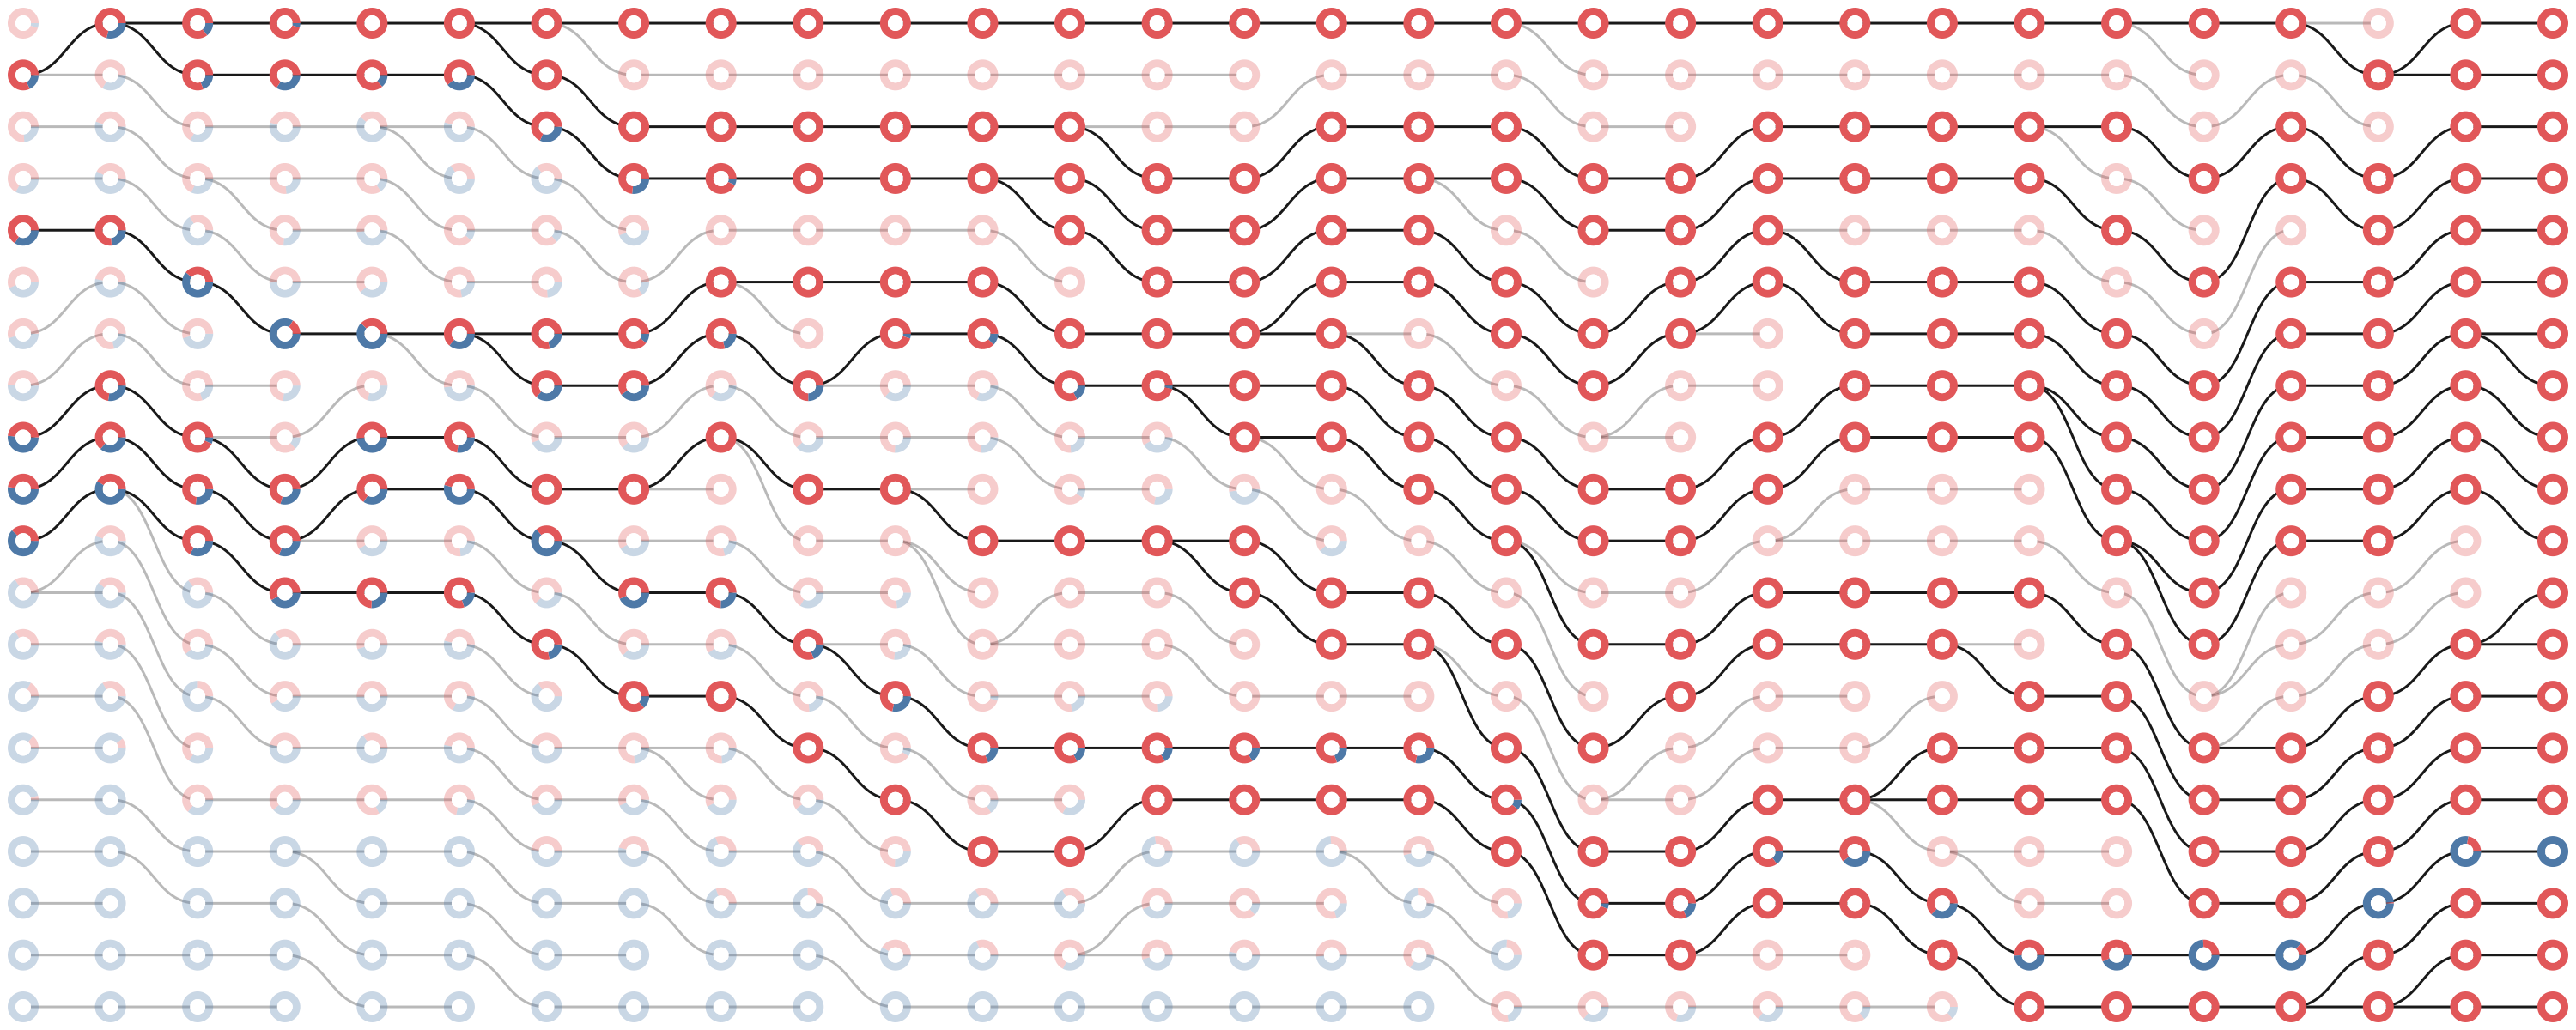

In [8]:
t = tv.extract_tree(out)
fig = tv.draw_tree_rings(branches=t['branches'],
                         xinfo=t['generation'], 
                         yinfo=t['position'], 
                         zinfo=t['colour'], 
                         oinfo='coal', width=3000, height=1200, size=18)
fname = os.path.join(SUPFIGPATH,'tree_noselect.png')
fig.write_to_png(fname)

Image(filename=fname) 

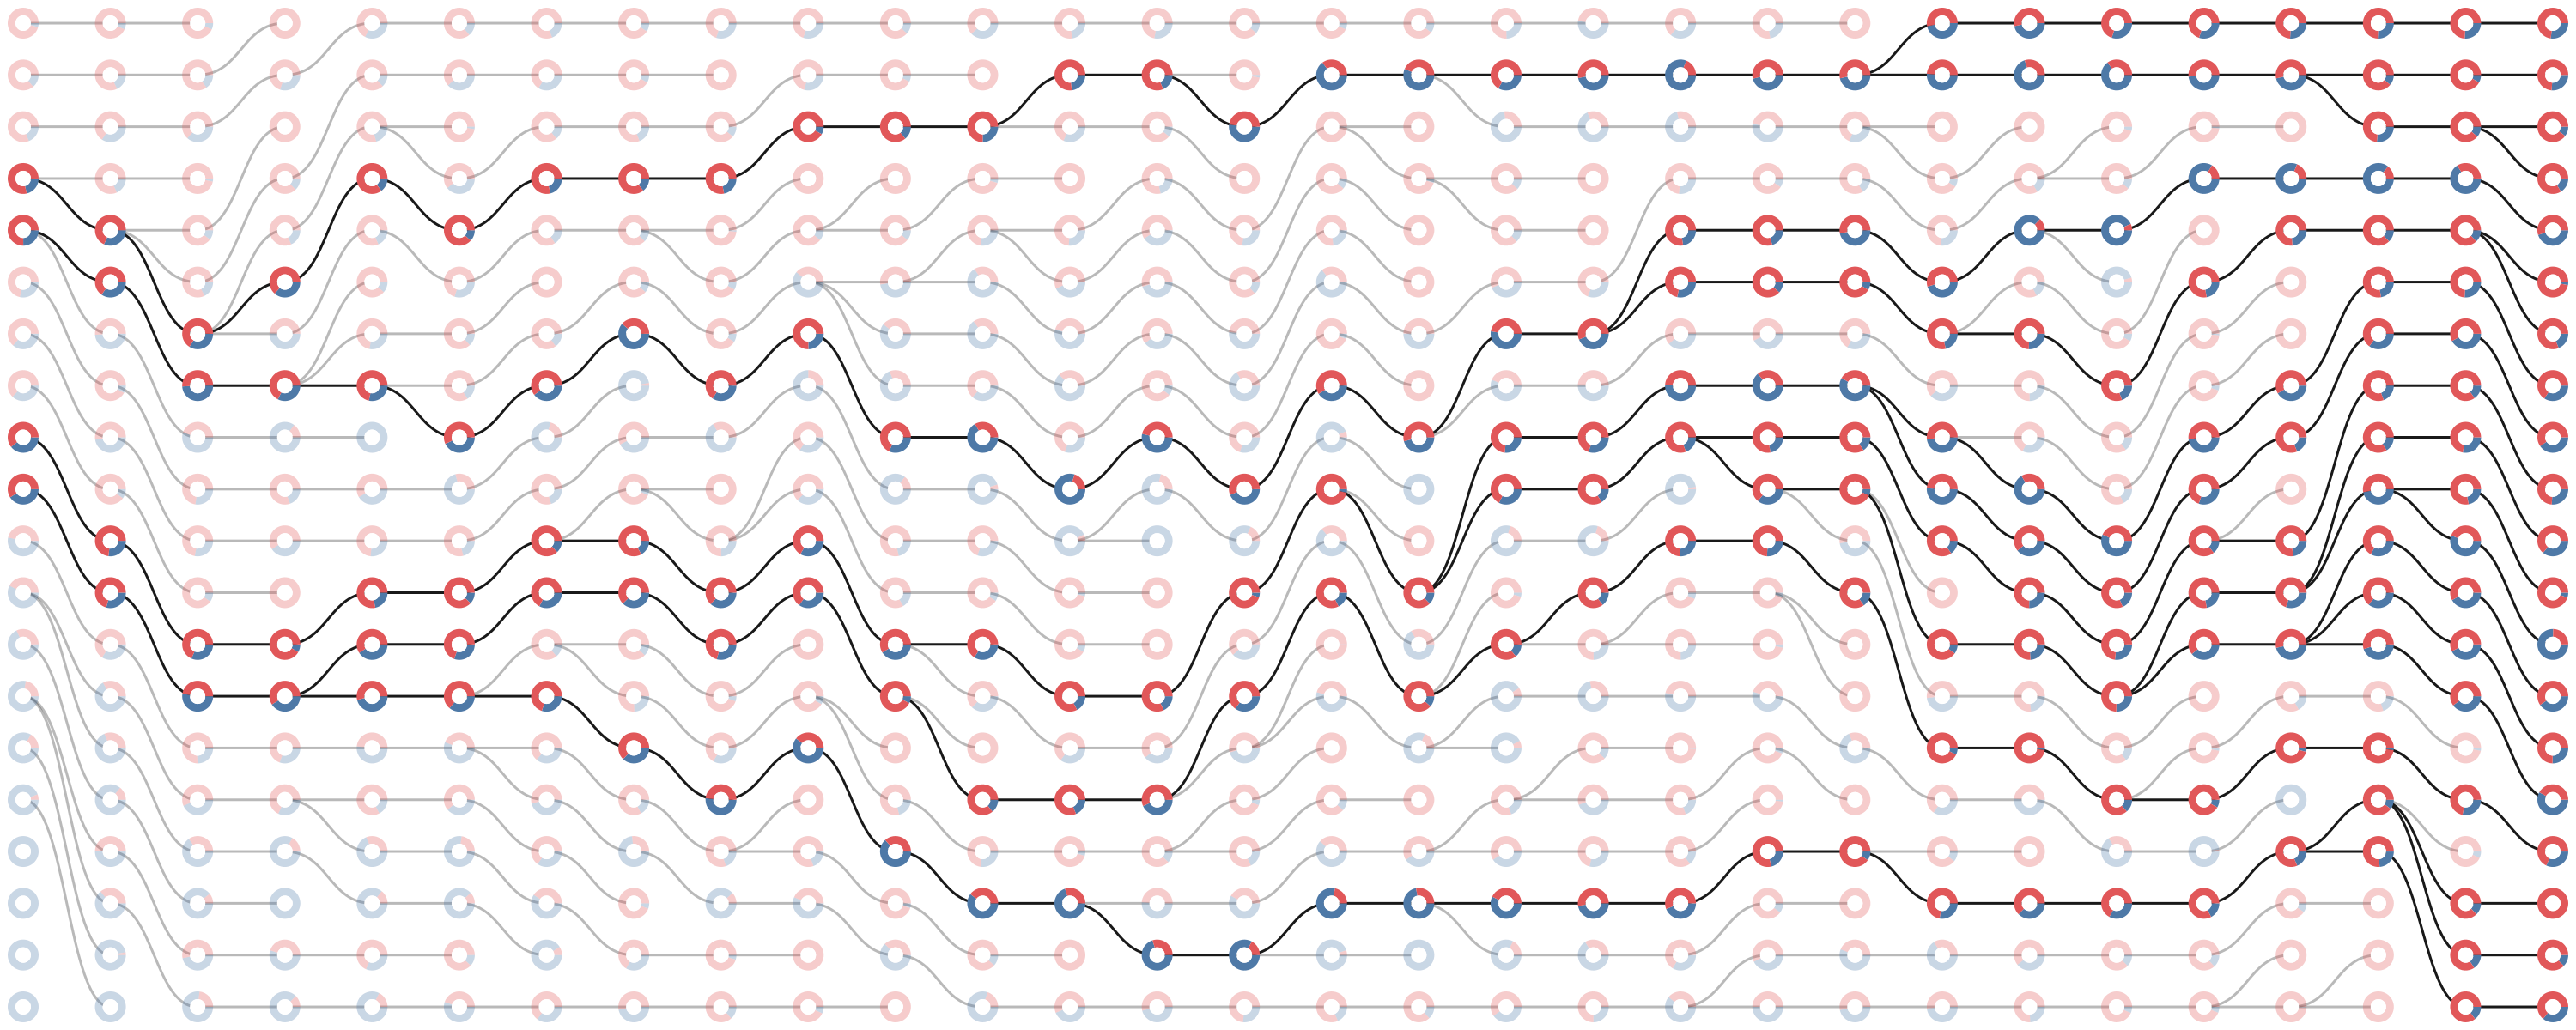

In [10]:
np.random.seed(120293)
p.update({'N':30,'D':20, 'selection':'rank', 'percentile':10, 
          'initial_type0': (0,5,0.6,.5),
      'initial_type1':(1,5,0.8,.5)}
    )
out = full_trajectory.main(p, pool=pool)

t = tv.extract_tree(out)
fig = tv.draw_tree_rings(branches=t['branches'],
                         xinfo=t['generation'], 
                         yinfo=t['position'], 
                         zinfo=t['colour'], 
                         oinfo='coal', width=3000, height=1200, size=18)
fname = os.path.join(SUPFIGPATH,'tree_select.png')
fig.write_to_png(fname)
Image(filename=fname) 